In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# modelling dependent variable are total marks and average
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings


In [4]:
df = pd.read_csv('data/stud.csv')

In [5]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [6]:
X= df.drop('math score',axis=1)

In [9]:
Y = df['math score']

In [14]:
## column transfromer with 3 types of transformers

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
ohe = OneHotEncoder()
ss = StandardScaler()
preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',ohe,cat_features),
        ('standardScaler',ss,num_features),
    ]
)

In [15]:
X = preprocessor.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [17]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true,predicted)
    return mae,rmse,r2,mse



In [18]:
models={
    'linearReg':LinearRegression(),
    'ridge':Ridge(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [22]:
model_list =[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,Y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    

    model_train_mae,model_train_rmse,model_train_r2,model_train_mse = evaluate_model(Y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2,model_test_mse = evaluate_model(Y_test,y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    r2_list.append(model_test_r2)
    
    print("="*35)
    print('\n')

linearReg
Model performance for Training set
- Root Mean Squared Error: 5.3244
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
- Mean Squared Error: 28.3487
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803
- Mean Squared Error: 29.1167


ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
- Mean Squared Error: 28.3378
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806
- Mean Squared Error: 29.0563


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
- Mean Squared Error: 43.4784
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253
- Mean Squared Error: 4

In [23]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_score']).sort_values(by=['R2_score'],ascending=False)

,Model Name,R2_score
1,ridge,0.880593
0,linearReg,0.880345
5,Random Forest Regressor,0.853289
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.848019
6,XGBRegressor,0.827797
2,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.728567


In [25]:

lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.03


Text(0, 0.5, 'Predicted')

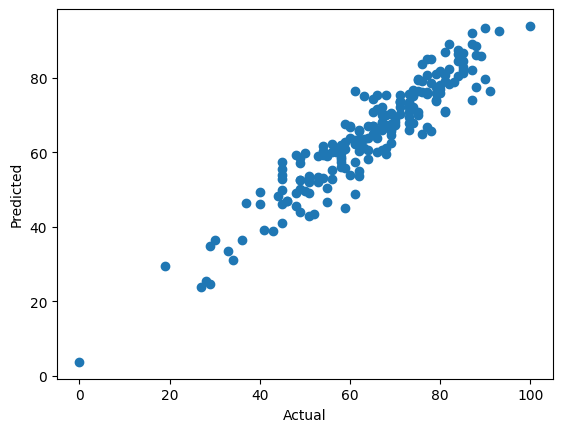

In [26]:

plt.scatter(Y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

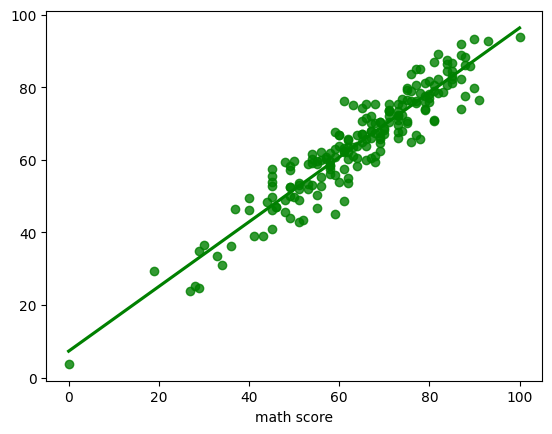

In [29]:

sns.regplot(x=Y_test,y=y_pred,ci=None,color ='green')

In [30]:

pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_pred,'Difference':Y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
